In [1]:
#importing all the neccessary libraries
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly as plot


import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
from plotly.offline import init_notebook_mode, plot, iplot

import os
os.chdir(r'c:/Users/sid//Downloads/Heart-Disease-Prediction-master/Heart-Disease-Prediction-master/')

In [2]:
import warnings
warnings.filterwarnings('ignore')

# The dataset contains the following features:
age: The person's age in years


sex: The person's sex (1 = male, 0 = female)


cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)


trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)


chol: The person's cholesterol measurement in mg/dl


fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)


restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)


thalach: The person's maximum heart rate achieved


exang: Exercise induced angina (1 = yes; 0 = no)


oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)


slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)


ca: The number of major vessels (0-3)


thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)


target: Heart disease (0 = no, 1 = yes)


In [3]:
#reading the dataset
df = pd.read_csv('heart.csv')

In [4]:
#topmost values
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#columns in dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
#total number of columns
len(df.columns)

14

In [7]:
# let's change the names of the  columns for better understanding
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']


In [8]:
#topmost values of dataframe
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
print('Number of rows in the dataset: ', df.shape[0])
print('Number of columns in the dataset: ', df.shape[1])

Number of rows in the dataset:  303
Number of columns in the dataset:  14


In [10]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [11]:
#describes the dataset with values such as mean, median , mode etc..
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
#shows total numbeer of missing values
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [13]:
#shows all info of all the features of features in the dataset
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

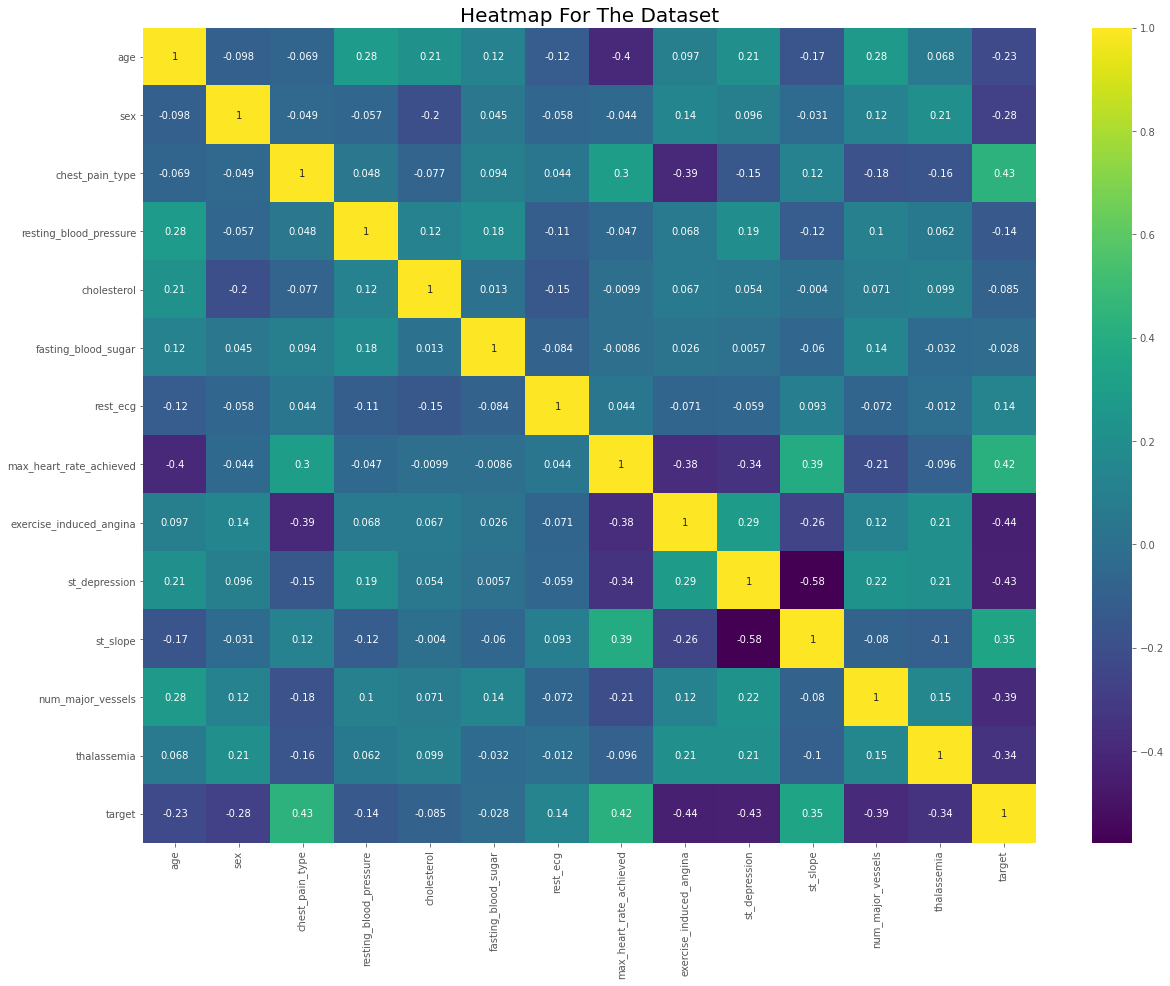

In [14]:
#heat map
#Heatmap shows the correlation between features of the dataset.
#There is very less correlated with each other

plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')

sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Heatmap For The Dataset', fontsize=20)
plt.show()


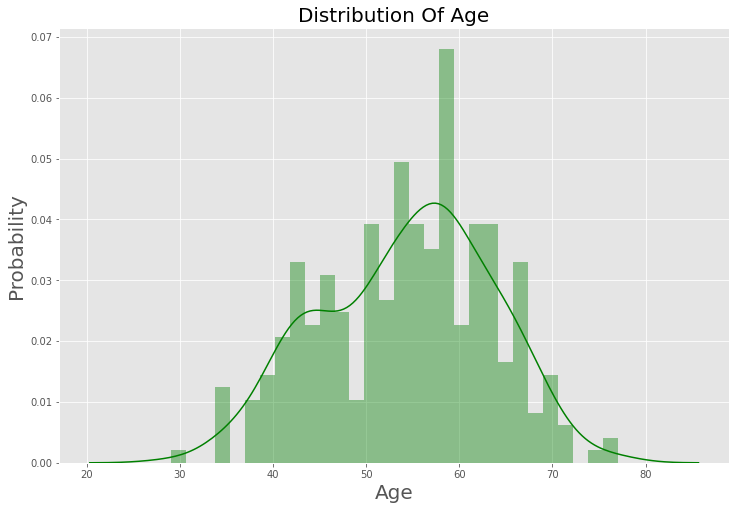

In [15]:
#plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12 , 8)
sns.distplot(df['age'],bins=30, color='green')
plt.title('Distribution Of Age', fontsize=20)
plt.xlabel("Age", fontsize=20)
plt.ylabel("Probability", fontsize=20)
plt.show()

#distribution is spead from 20 years to 80 years...
#people between 55-65 are most suffering from heart disease..
#between 20-30 years of age people have very less probability of suffering from heart disease..



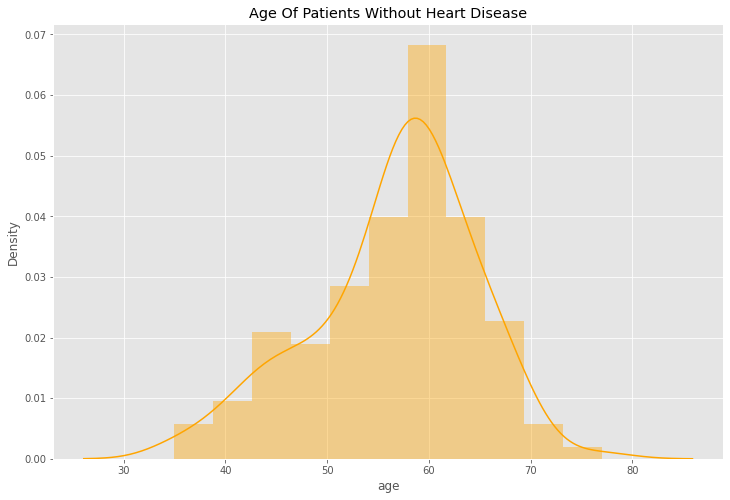

In [16]:
#create four distplot
plt.figure(figsize=(12, 8))
sns.distplot(df[df['target']==0].age, color='orange')
plt.title('Age Of Patients Without Heart Disease')
plt.show()

#people without heart disease
#seems as you get older lesser chances of getting heart disease

Text(0.5, 1.0, 'Age Of Patients With Heart Disease')

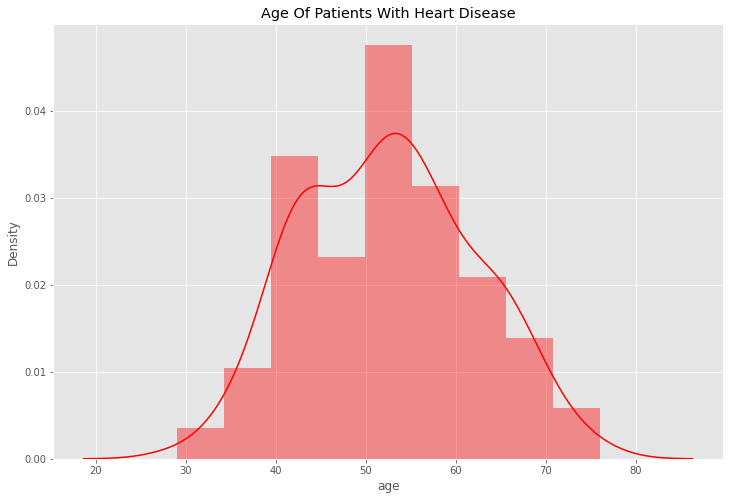

In [17]:
plt.figure(figsize=(12, 8))
sns.distplot(df[df['target']==1].age, color='red')
plt.title('Age Of Patients With Heart Disease')

#people with heart disease

Text(0, 0.5, 'Count')

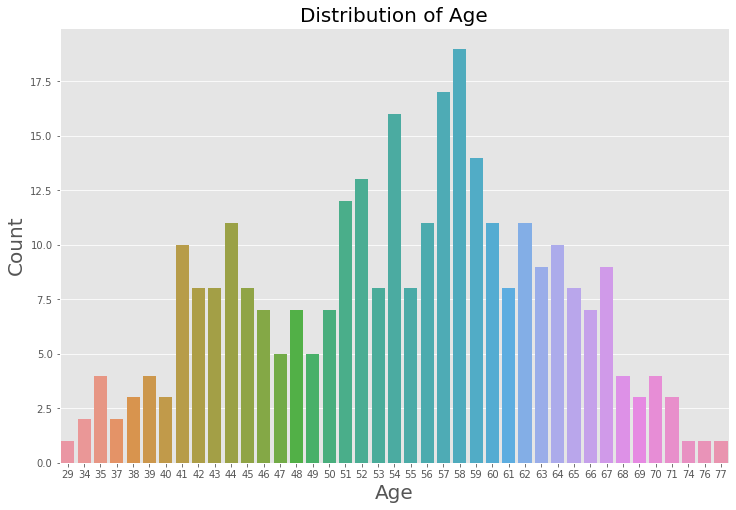

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(df['age'])
plt.title("Distribution of Age", fontsize=20)
plt.xlabel("Age", fontsize=20)
plt.ylabel("Count", fontsize=20)

In [19]:
#205 males
#96 females
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

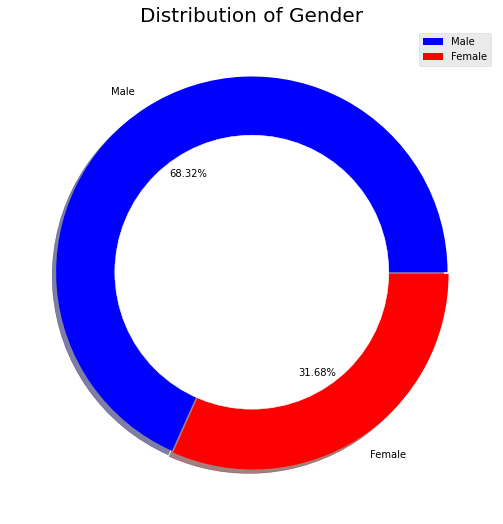

In [20]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = df['sex'].value_counts()
colors = ['blue', 'red']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

Text(0, 0.5, 'Count')

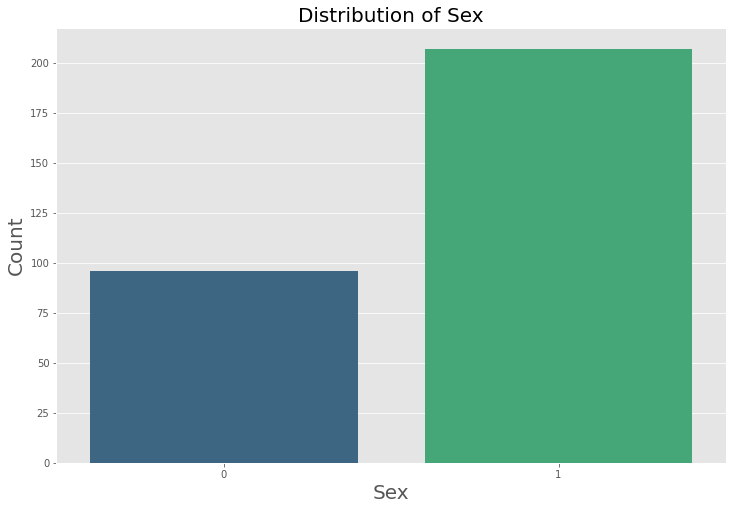

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(df['sex'], palette='viridis')
plt.title("Distribution of Sex", fontsize=20)
plt.xlabel("Sex", fontsize=20)
plt.ylabel("Count", fontsize=20)

In [22]:
df['chest_pain_type'].value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain_type, dtype: int64

Text(0, 0.5, 'Count')

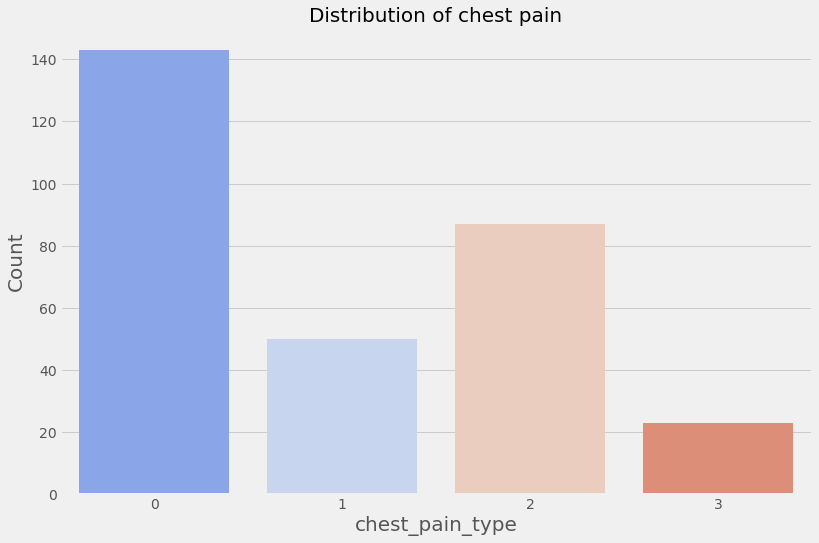

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(df['chest_pain_type'], palette='coolwarm')
plt.title("Distribution of chest pain", fontsize=20)
plt.xlabel("chest_pain_type", fontsize=20)
plt.ylabel("Count", fontsize=20)

Text(0, 0.5, 'Probability')

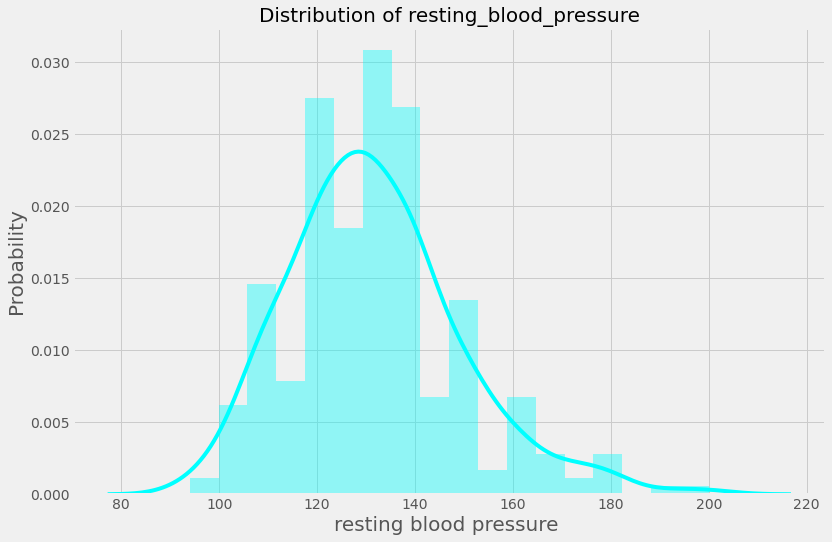

In [24]:
plt.figure(figsize=(12, 8))
sns.distplot(df['resting_blood_pressure'], color='cyan')
plt.title("Distribution of resting_blood_pressure", fontsize=20)
plt.xlabel("resting blood pressure ", fontsize=20)
plt.ylabel("Probability", fontsize=20)

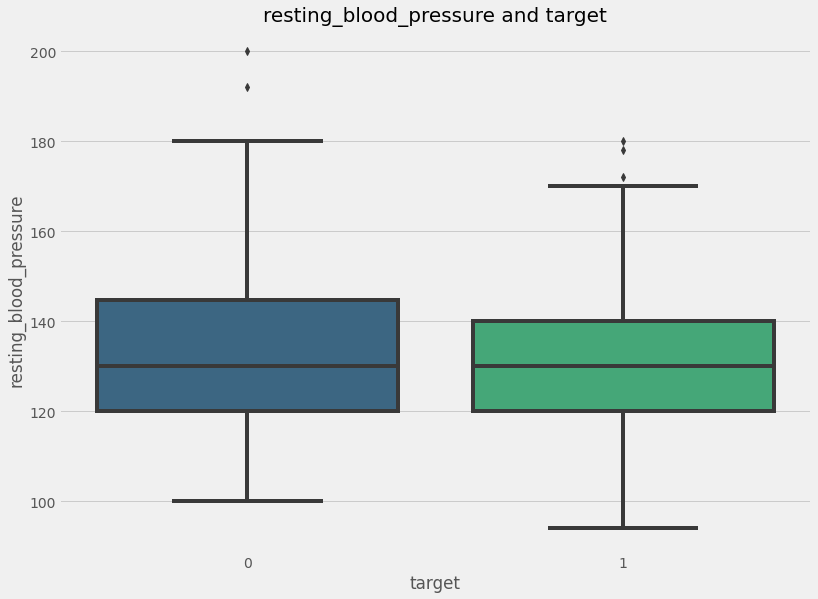

In [25]:
#target vs resting_blood_pressure of patient's

plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df['target'], df['resting_blood_pressure'], palette = 'viridis')
plt.title('resting_blood_pressure and target', fontsize = 20)
plt.show()

Text(0, 0.5, 'Probability')

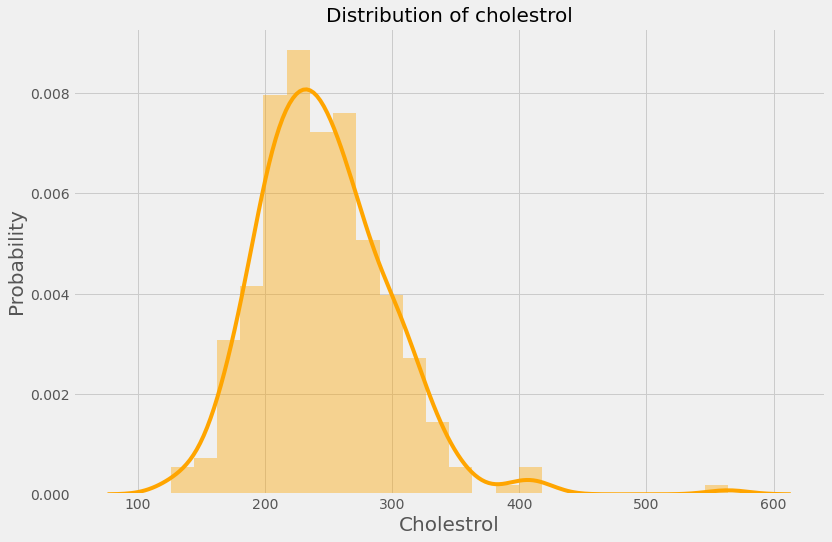

In [26]:
plt.figure(figsize=(12, 8))
sns.distplot(df['cholesterol'], color='orange')
plt.title("Distribution of cholestrol", fontsize=20)
plt.xlabel("Cholestrol", fontsize=20)
plt.ylabel("Probability", fontsize=20)

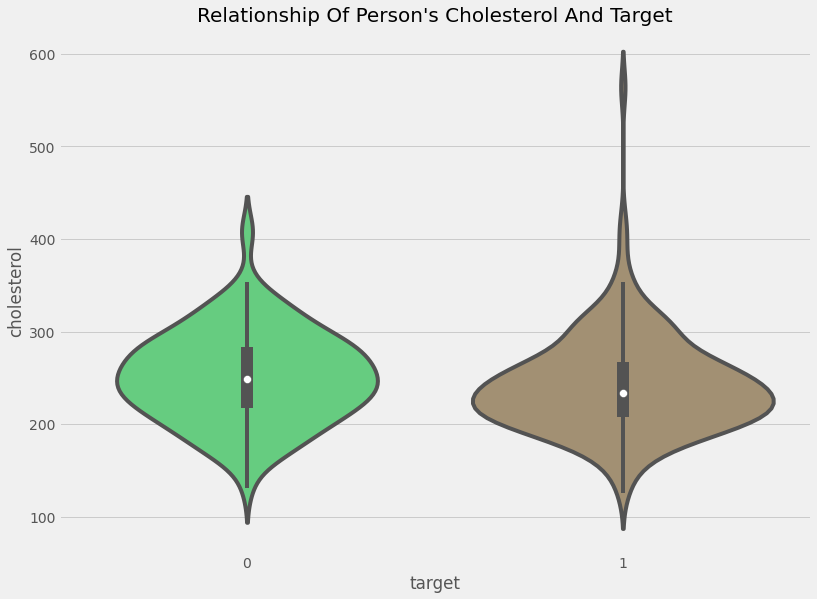

In [27]:
#chol: The person's cholesterol measurement in mg/dl
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(df['target'], df['cholesterol'], palette='terrain')
plt.title("Relationship Of Person's Cholesterol And Target", fontsize = 20, fontweight = 30)
plt.show()


In [28]:
# for advanced visualizations 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

In [29]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = df, x_column = 'resting_blood_pressure', y_column = 'cholesterol', 
    bubble_column = 'sex', time_column = 'age', size_column = 'st_depression', color_column = 'sex', 
    x_title = "Resting Blood Pressure", y_title = "cholesterol", title = 'BP vs Chol. vs Age vs Sex vs Heart Rate',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

In [30]:
df['fasting_blood_sugar'].value_counts()

0    258
1     45
Name: fasting_blood_sugar, dtype: int64

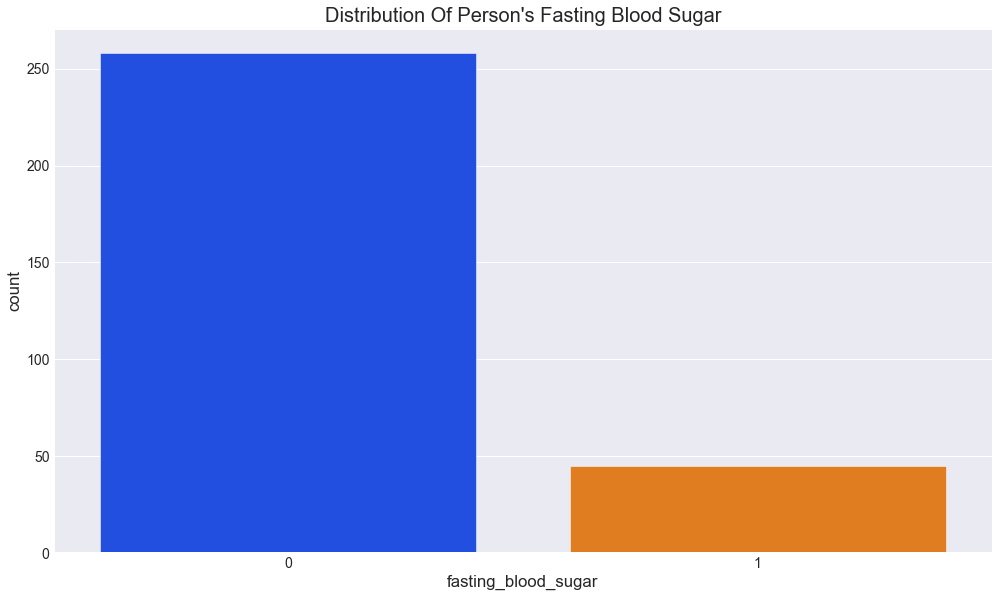

In [31]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.set_style('darkgrid')
plt.title("Distribution Of Person's Fasting Blood Sugar", fontsize=20)
sns.countplot(df['fasting_blood_sugar'], palette='bright')
plt.show()

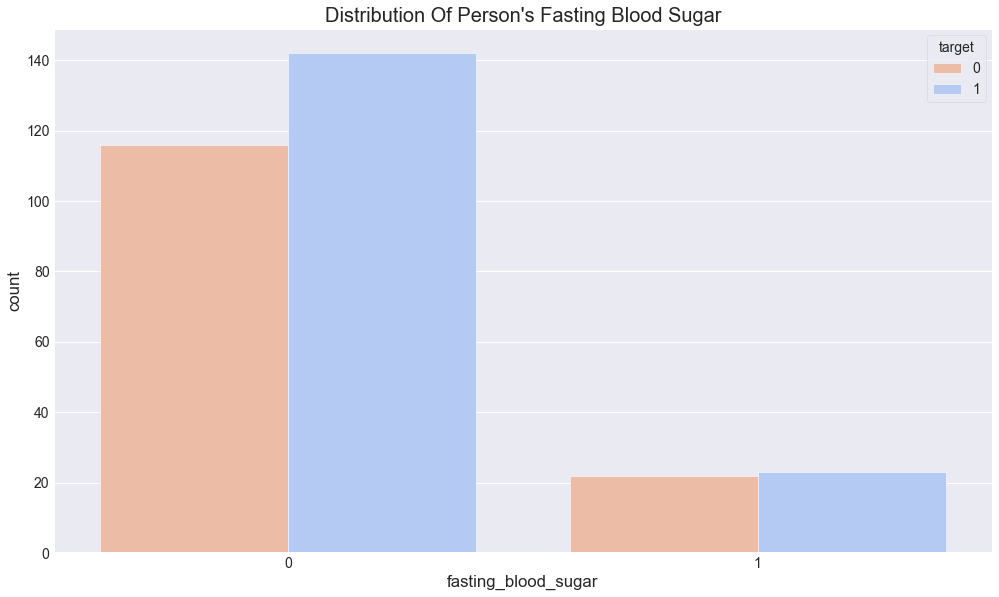

In [32]:
#fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

plt.title("Distribution Of Person's Fasting Blood Sugar", fontsize=20)
sns.countplot(df['fasting_blood_sugar'],hue=df['target'], palette='coolwarm_r')
plt.show()

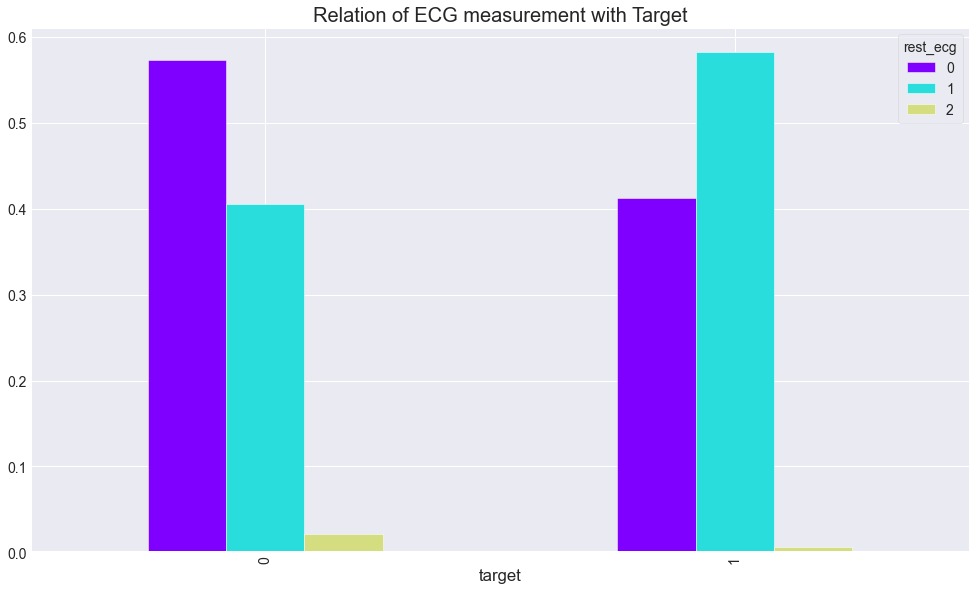

In [33]:
plt.rcParams['figure.figsize'] = (15, 9)
dat = pd.crosstab(df['target'], df['rest_ecg'])
dat.div(dat.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False,
                                              color=plt.cm.rainbow(np.linspace(0, 1, 4)))

plt.title('Relation of ECG measurement with Target', fontsize = 20, fontweight = 30)
plt.show()

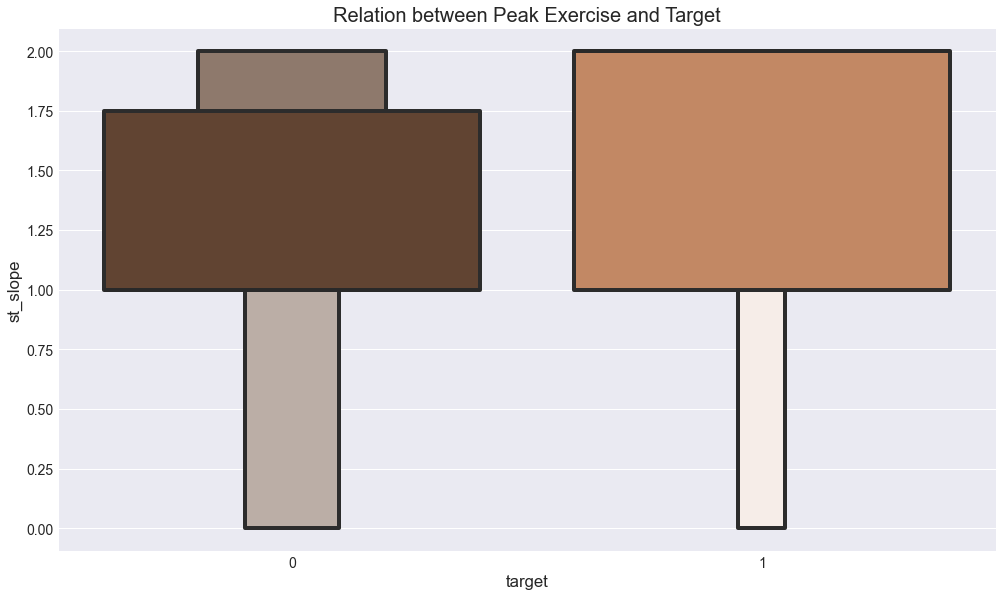

In [34]:
# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
# checking the relation between slope and target

plt.rcParams['figure.figsize'] = (15, 9)
sns.boxenplot(df['target'], df['st_slope'], palette = 'copper')
plt.title('Relation between Peak Exercise and Target', fontsize = 20, fontweight = 30)
plt.show()

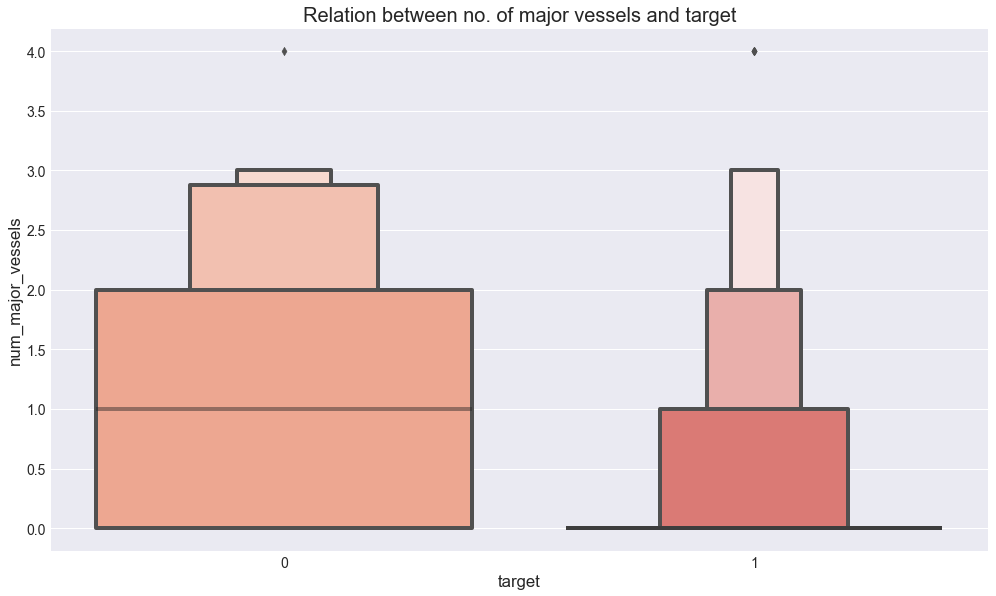

In [35]:
#ca: The number of major vessels (0-3)

sns.boxenplot(df['target'], df['num_major_vessels'], palette = 'Reds')
plt.title('Relation between no. of major vessels and target', fontsize = 20, fontweight = 30)
plt.show()

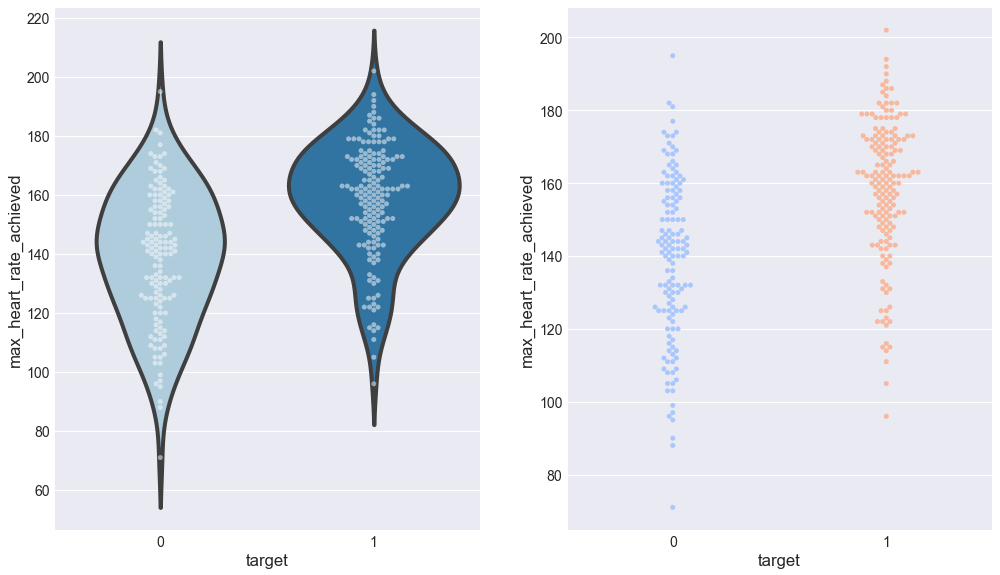

In [36]:
plt.figure(figsize=(15 ,9))
plt.subplot(121)
sns.violinplot(x='target', y='max_heart_rate_achieved', data=df, inner=None, palette='Paired')
sns.swarmplot(x='target', y='max_heart_rate_achieved', data=df, color='w', alpha=0.5)

plt.subplot(122)
sns.swarmplot(x='target', y='max_heart_rate_achieved', data=df, palette='coolwarm')
plt.show()

In [37]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [38]:
x = df.drop('target', axis=1)
y =df['target']

In [39]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train, y_test = train_test_split(x, y, test_size=.3, 
                                                   random_state=42)

# Preprocessing - Scaling the features

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
x_train

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [43]:
x_test

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3


In [44]:
y_train

124    1
72     1
15     1
10     1
163    1
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 212, dtype: int64

In [45]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
250    0
19     1
143    1
79     1
144    1
Name: target, Length: 91, dtype: int64

In [46]:
scaled_x_train = scaler.fit_transform(x_train)

In [47]:
x_train = pd.DataFrame(scaled_x_train)

scaled_x_test = scaler.transform(x_test)
x_test = pd.DataFrame(scaled_x_test)

# 1. K-Nearest Neighbor Algorithm

Implementing GridSearchCv to select best parameters and applying k-NN Algorithm

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
params = {'n_neighbors': list(range(1, 20)),
         'p': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
         'leaf_size': list(range(1, 20)),
         'weights': ['uniform', 'distance']
         }

In [49]:
model = GridSearchCV(knn , params , cv=3, n_jobs=-1)

In [50]:
model.fit(x_train, y_train)
model.best_params_ 
#print parameters best values

{'leaf_size': 1, 'n_neighbors': 14, 'p': 2, 'weights': 'uniform'}

In [51]:
predict = model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.8131868131868132
Using k-NN we get an accuracy score of:  81.319 %


In [53]:
cnf_matrix = confusion_matrix(y_test, predict)
cnf_matrix

array([[32,  9],
       [ 8, 42]], dtype=int64)

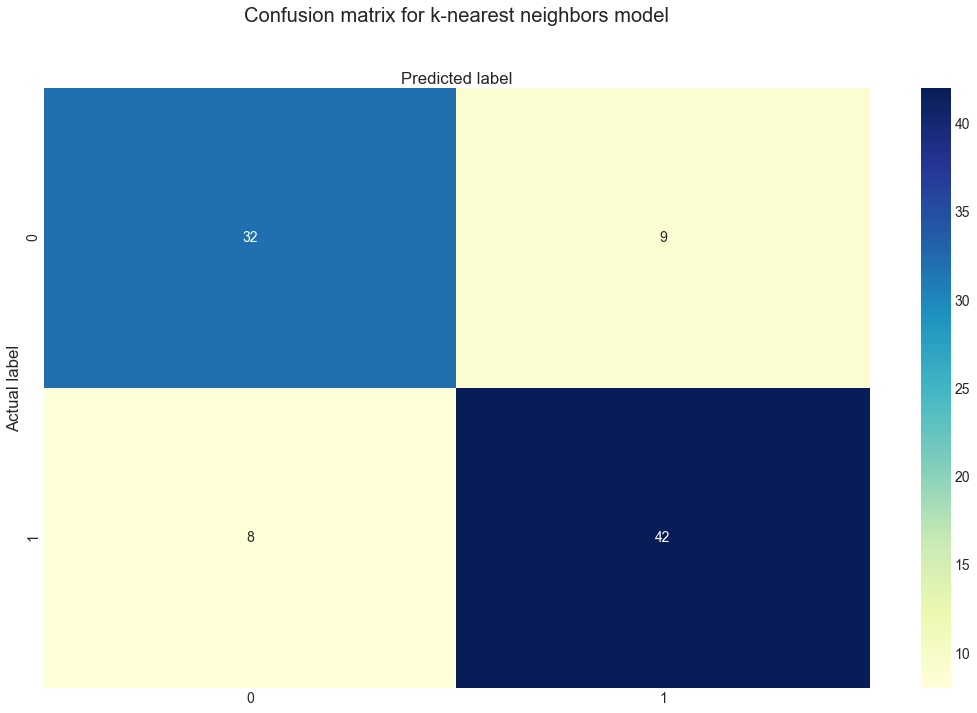

In [54]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names )
plt.yticks(tick_marks, class_names )

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu',
           fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("Confusion matrix for k-nearest neighbors model", y=1.1)
plt.ylabel('Actual label')
plt.xlabel("Predicted label")
plt.show()

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [56]:
from sklearn.metrics import roc_auc_score, roc_curve

In [57]:
#get predicted probabilities from the model
y_probabilities = model.predict_proba(x_test)[:, 1]

In [58]:
#create true and false positive rates
false_positive_rate_knn, true_positive_rate_knn, threshold_knn = roc_curve(y_test,
                                                    y_probabilities)

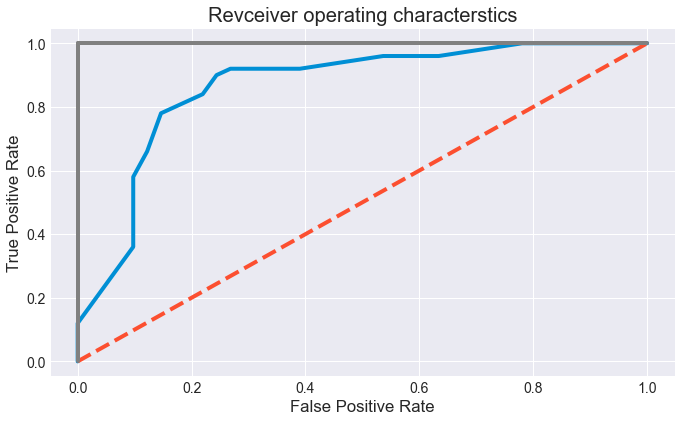

In [59]:
#plot roc curve
plt.figure(figsize=(10, 6))
plt.title("Revceiver operating characterstics")
plt.plot(false_positive_rate_knn, true_positive_rate_knn)
plt.plot([0, 1], ls='--')
plt.plot([0, 0], [1, 0], c='0.5')
plt.plot([1, 1], c='0.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [60]:
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8651219512195122

# 2. Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [62]:
#setting parameters for gridsearchCV
params = {'penalty': ['l1', 'l2'], 
         'C':[0.01, 0.1, 1, 10, 100],
         'class_weight':['balanced', None]}

log_model = GridSearchCV(log, param_grid=params, cv=10)

In [63]:
log_model.fit(x_train , y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']})

In [64]:
# Printing best parameters choosen through GridSearchCV
log_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

In [65]:
predict = log_model.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Logistic Regression we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.8241758241758241
Using Logistic Regression we get an accuracy score of:  82.418 %


In [67]:
from sklearn.metrics import recall_score, precision_score, classification_report, roc_auc_score, roc_curve
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [68]:
# Confusion Matrix

In [69]:
cnf_matrix = confusion_matrix(y_test, predict)
cnf_matrix

array([[33,  8],
       [ 8, 42]], dtype=int64)

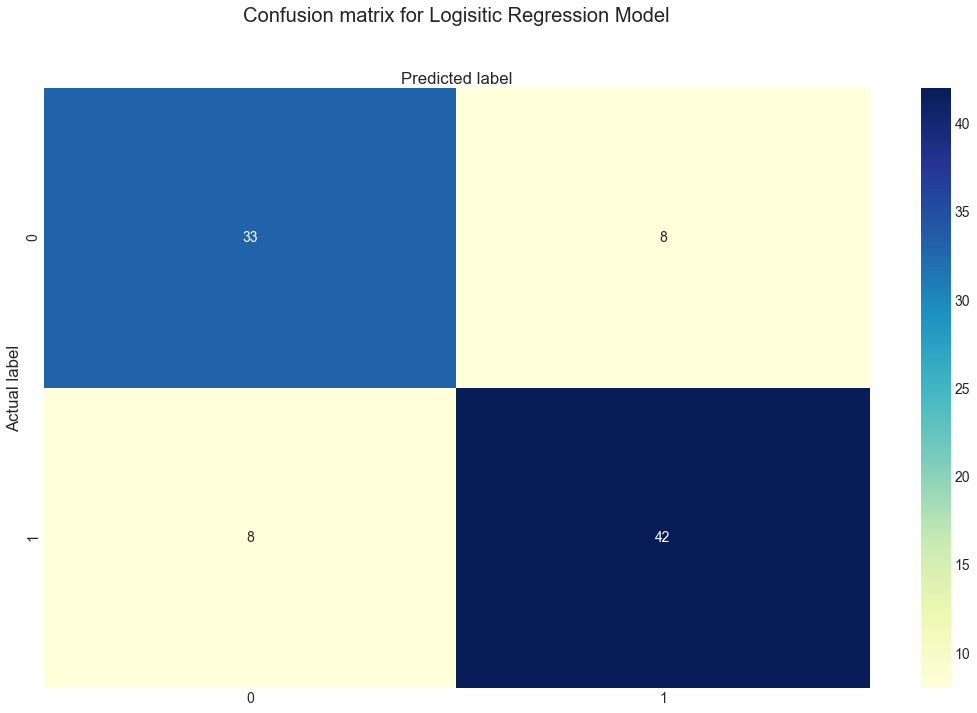

In [70]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Logisitic Regression Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [71]:
#get predicted probabilities
target_probabilities_log = log_model.predict_proba(x_test)[:, 1]

In [72]:
#create true and false positive rates
log_false_positive_rate, log_true_positive_rate, log_threshold =roc_curve(y_test, target_probabilities_log)

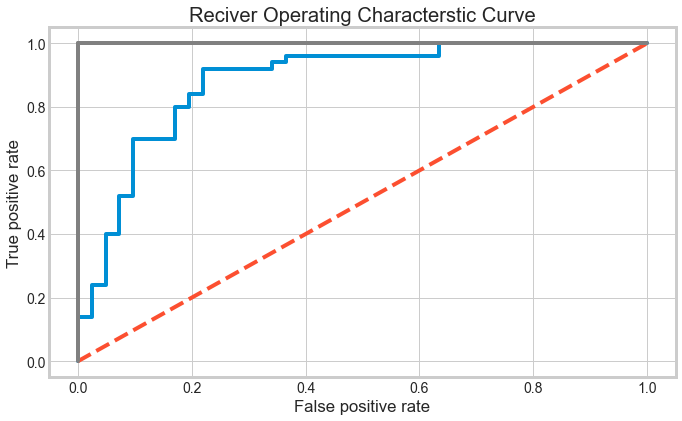

In [73]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate, log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [74]:
roc_auc_score(y_test, target_probabilities_log)

0.8814634146341463

In [75]:
# 3 Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=7)

In [77]:
#Setting parameters for GridSearchCV
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_model = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [78]:
tree_model.fit(x_train ,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=7), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              11],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15]})

In [79]:
tree_model.best_params_

{'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 11}

In [80]:
predict = tree_model.predict(x_test)

# Accuracy Metrics

In [81]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Decision Tree we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.7252747252747253
Using Decision Tree we get an accuracy score of:  72.527 %


In [82]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [83]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



In [84]:
cnf_matrix = confusion_matrix(y_test, predict)

In [86]:
cnf_matrix

array([[31, 10],
       [15, 35]], dtype=int64)

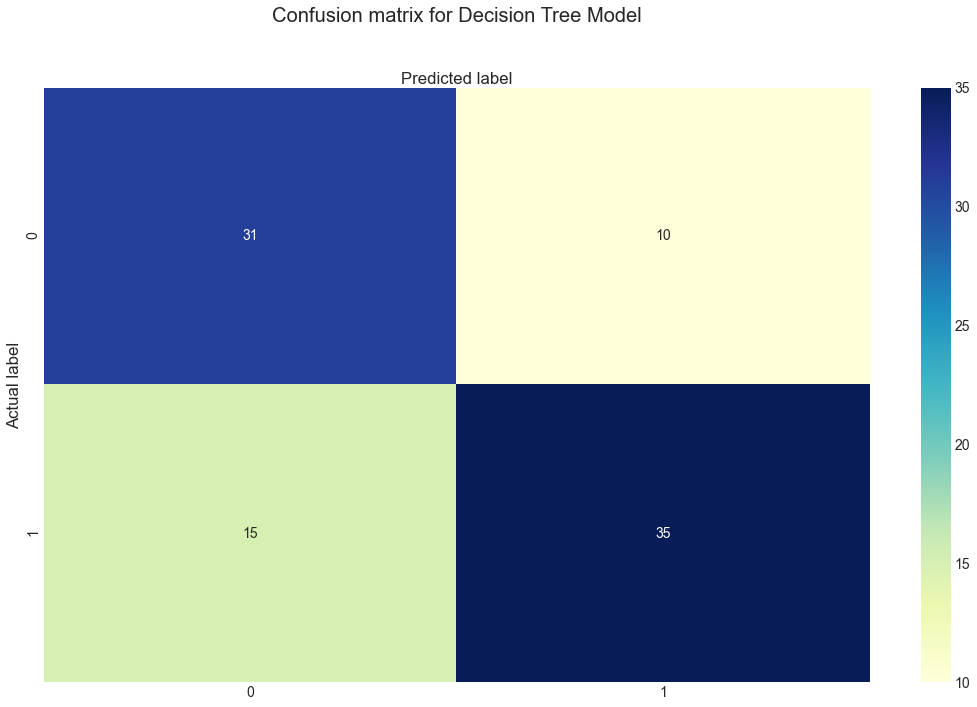

In [87]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', 
           fmt='g')

ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("Confusion matrix for Decision Tree Model", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [88]:
class_names

[0, 1]